# MNIST 手写数字分类数据集

该MNIST数据集是代表标准和技术数据集的改良研究所的缩写。    
它是一个包含 60,000 张 0 到 9 之间的手写单个数字的 60,000 个小正方形 28×28 像素灰度图像的数据集。  
任务是将给定的手写数字图像分类为 10 个类别之一，代表从 0 到 9 的整数值，包括 0 到 9。  
它是一个广泛使用且深入理解的数据集，并且在大多数情况下已“解决”。表现最好的模型是深度学习卷积神经网络，其分类准确率超过 99%，在保持测试数据集上的错误率在 0.4% 到 0.2% 之间。

下面的示例使用 Keras API 加载 MNIST 数据集，并创建训练数据集中前九张图像的图。  
运行示例加载 MNIST 训练和测试数据集并打印它们的形状。  
我们可以看到训练数据集中有 60,000 个示例，测试数据集中有 10,000 个示例，并且图像确实是具有 28×28 像素的正方形。

Using TensorFlow backend.


Train: X=(60000, 28, 28), Y=(60000,)
Test: X=(10000, 28, 28), Y=(10000,)


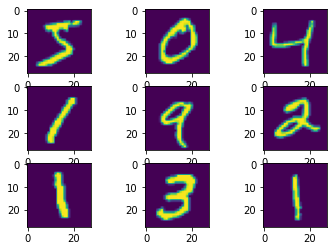

In [1]:
from keras.datasets import mnist
import matplotlib.pyplot as plt
# 载入数据集
(trainX, trainY), (testX, testY) = mnist.load_data()
print('Train: X=%s, Y=%s'%(trainX.shape, trainY.shape))
print('Test: X=%s, Y=%s'%(testX.shape, testY.shape))
# 画出一些图
for i in range(9):
    plt.subplot(330+1+i)
    plt.imshow(trainX[i])
plt.show()

## 正式开始  

在这个循序渐进的 Keras 教程中，您将学习如何用 Python 构建卷积神经网络！

事实上，我们将训练一个手写数字分类器，它在著名的MNIST数据集上的准确率超过 99%  。

在开始之前，我们应该注意本指南面向对应用深度学习感兴趣的初学者 。

我们的目标是向您介绍最流行和最强大的库之一，用于在 Python 中构建神经网络。这意味着我们将复习大部分理论和数学，但我们也会为您提供学习这些的重要资源。

**WTF是深度学习？**

深度学习是指具有多个隐藏层的神经网络，可以学习越来越抽象的输入数据表示。这显然过于简单化，但现在对我们来说这是一个实用的定义。  

例如，深度学习在计算机视觉方面取得了重大进展。我们现在能够对图像进行分类，在其中查找对象，甚至可以用标题标记它们。为此，具有许多隐藏层的深度神经网络可以从原始输入图像中依次学习更复杂的特征：  

- 第一个隐藏层可能只学习局部边缘模式。  
- 然后，每个后续层（或过滤器）学习更复杂的表示。  
- 最后，最后一层可以将图像分类为猫或袋鼠。  
- 这些类型的深度神经网络称为 卷积神经网络。  

以下是使用 Keras 构建您的第一个 CNN 的步骤：

1. 设置您的环境。
2. 安装 Keras。
3. 导入库和模块。
4. 从 MNIST 加载图像数据。
5. 为 Keras 预处理输入数据。
6. 为 Keras 预处理类标签。
7. 定义模型架构。
8. 编译模型。
9. 在训练数据上拟合模型。
10. 根据测试数据评估模型。

### 第 1 步：设置您的环境。
Python环境，建议Anaconda
### 第 2 步：安装 Keras。
```python
 pip install keras
```    
然后测试是否安装成功

In [2]:
!python -c "import keras; print(keras.__version__)"

2.3.1


Using TensorFlow backend.


### 第 3 步：导入库和模块。
让我们从导入 numpy 并为计算机的伪随机数生成器设置种子开始。这允许我们从我们的脚本中重现结果：

In [3]:
import numpy as np
np.random.seed(123)

接下来，我们将从 Keras 导入 Sequential 模型类型。这只是神经网络层的线性堆栈，非常适合我们在本教程中构建的前馈 CNN 类型。

In [4]:
from keras.models import Sequential

接下来，让我们从 Keras 导入“核心”层。这些是几乎用于任何神经网络的层：

In [5]:
from keras.layers import Dense, Dropout, Activation, Flatten

然后，我们将从 Keras 导入 CNN 层。这些卷积层将帮助我们有效地训练图像数据：

In [6]:
from keras.layers import Conv2D, MaxPool2D

最后，我们将导入一些实用程序。这将帮助我们稍后转换我们的数据：

In [7]:
from keras.utils import np_utils

现在我们拥有构建神经网络架构所需的一切。  

### 第 4 步：从 MNIST 加载图像数据。  
MNIST 是深度学习和计算机视觉入门的绝佳数据集。对于神经网络而言，这是一个足够大的挑战，但它可以在单台计算机上进行管理。我们在帖子中对此进行了更多讨论：[面向初学者的有趣机器学习项目](https://elitedatascience.com/machine-learning-projects-for-beginners)。

Keras 库已经很方便地包含了它。我们可以像这样加载它：

In [8]:
from keras.datasets import mnist
# 载入数据集
(X_train, y_train), (X_test, y_test) = mnist.load_data()

我们可以看一下数据集的形状：

In [9]:
print(X_train.shape, y_train.shape)

(60000, 28, 28) (60000,)


看起来我们的训练集中有 60,000 个样本，每个图像都是 28 像素 x 28 像素。我们可以通过在 matplotlib 中绘制第一个样本来确认这一点：

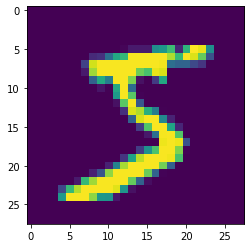

In [10]:
from matplotlib import pyplot as plt
plt.imshow(X_train[0])

一般来说，在使用计算机视觉时，在进行任何算法工作之前直观地绘制数据是有帮助的。这是一种快速的健全性检查，可以防止容易避免的错误（例如误解数据维度）。

### 步骤 5：为 Keras 预处理输入数据。   
使用 Theano 后端时，您必须明确声明输入图像深度的维度。例如，具有所有3个RGB通道的全彩色图像 的深度为3。  

我们的 MNIST 图像只有 1 的深度，但我们必须明确声明。  

换句话说，我们想将我们的数据集从形状（n，宽度，高度）转换为（n，宽度，高度，深度）。  

以下是我们如何轻松做到这一点：  

In [11]:
X_train = X_train.reshape(X_train.shape[0], 28,28,1)
X_test = X_test.reshape(X_test.shape[0], 28,28,1)
print(X_train.shape)

(60000, 28, 28, 1)


输入数据的最后预处理步骤是将我们的数据类型转换为 float32 并将我们的数据值规范化为范围 [0, 1]。

In [12]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

现在，我们的输入数据已准备好进行模型训练。

### 第 6 步：预处理 Keras 的类标签。
接下来，让我们看看我们的类标签数据的形状：

In [13]:
print(y_train.shape)

(60000,)


我们应该有 10 个不同的类，每个数字一个，但看起来我们只有一个一维数组。我们来看看前 10 个训练样本的标签：

In [14]:
print(y_train[:10])

[5 0 4 1 9 2 1 3 1 4]


问题来了。y_train 和 y_test 数据没有分成 10 个不同的类标签，而是表示为具有类值的单个数组。  

我们可以轻松解决这个问题：

In [15]:
# 将1维类数组转换为10维类矩阵
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)
print(Y_train.shape)

(60000, 10)


### 步骤 7：定义模型架构。  
现在我们已准备好定义我们的模型架构。在实际的研发工作中，研究人员会花费大量时间研究模型架构。  

为了让本教程继续进行，我们不打算在这里讨论理论或数学。仅此一项就是一个丰富而多肉的领域，我们向那些想要了解更多信息的人推荐前面提到的CS231n类。  

另外，当您刚开始时，您可以从学术论文中复制经过验证的架构或使用现有示例。这是Keras中的示例实现列表。  

让我们首先声明一个顺序模型格式：  

In [16]:
model = Sequential()

接下来，我们声明输入层：

In [17]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)))

输入形状参数应为 1 个样本的形状。在这种情况下，它与每个数字图像的（宽度、高度、深度）对应的 (28, 28, 1) 相同。

但是前三个参数代表什么？它们分别对应于要使用的卷积滤波器的数量、每个卷积核中的行数和每个卷积核中的列数。

*注意：步长默认为 (1,1)，可以使用“ subsample ”参数进行调整。

我们可以通过打印当前模型输出的形状来确认这一点：

In [18]:
print(model.output_shape)

(None, 26, 26, 32)


接下来，我们可以简单地向我们的模型添加更多层，就像我们在构建乐高积木一样：

In [19]:
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

同样，我们不会过多地讨论理论，但重要的是要突出我们刚刚添加的 Dropout层。这是一种正则化我们的模型以防止过度拟合的方法。您可以在此处阅读更多[相关信息](https://www.quora.com/How-does-the-dropout-method-work-in-deep-learning)。

MaxPooling2D 是一种通过在前一层滑动 2x2 池化过滤器并取 2x2 过滤器中 4 个值的最大值来减少模型中参数数量的方法。

到目前为止，对于模型参数，我们已经添加了两个卷积层。为了完成我们的模型架构，让我们添加一个全连接层，然后是输出层：

In [20]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

对于密集层，第一个参数是该层的输出大小。Keras 自动处理层之间的连接。

请注意，最后一层的输出大小为 10，对应于 10 类数字。

另请注意，来自卷积层的权重必须在将它们传递到完全连接的 Dense 层之前展平（使它们成为一维的）。

现在，我们需要做的就是定义损失函数和优化器，然后我们就可以对其进行训练了。

### 第八步：编译模型。
现在我们在主场！困难的部分已经结束。

我们只需要编译模型，然后就可以训练它了。当我们编译模型时，我们声明了损失函数和优化器（SGD、Adam 等）。

In [21]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

Keras 有多种[损失函数](https://keras.io/objectives/)和开箱即用的[优化器](https://keras.io/optimizers/)可供选择。

### 第 9 步：在训练数据上拟合模型。
为了拟合模型，我们所要做的就是声明要训练的批次大小和时期数，然后传入我们的训练数据。

In [22]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
60000/60000 [==============================] - 98s 2ms/step - loss: 0.2137 - accuracy: 0.9344
Epoch 2/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0884 - accuracy: 0.9734
Epoch 3/10
60000/60000 [==============================] - 93s 2ms/step - loss: 0.0672 - accuracy: 0.9800
Epoch 4/10
60000/60000 [==============================] - 88s 1ms/step - loss: 0.0560 - accuracy: 0.9833 
Epoch 5/10
60000/60000 [==============================] - 86s 1ms/step - loss: 0.0477 - accuracy: 0.9857
Epoch 6/10
60000/60000 [==============================] - 92s 2ms/step - loss: 0.0426 - accuracy: 0.9867
Epoch 7/10
60000/60000 [==============================] - 95s 2ms/step - loss: 0.0377 - accuracy: 0.9880
Epoch 8/10
60000/60000 [==============================] - 94s 2ms/step - loss: 0.0348 - accuracy: 0.9890
Epoch 9/10
60000/60000 [==============================] - 90s 1ms/step - loss: 0.0314 - accuracy: 0.9899
Epoch 10/10
60000/60000 [=============================

您还可以使用各种[回调](https://keras.io/callbacks/)来设置提前停止规则、沿途保存模型权重或记录每个训练时期的历史记录。

### 第 10 步：根据测试数据评估模型。
最后，我们可以在测试数据上评估我们的模型：

In [23]:
score = model.evaluate(X_test, Y_test, verbose=0)

恭喜……您已经完成了本 Keras 教程！

我们刚刚完成了 Keras 核心功能的旋风之旅，但我们只是触及了皮毛。希望您已经获得了进一步探索 Keras 所提供的一切的基础。

为了继续学习，我们建议在 [Keras](https://github.com/fchollet/keras/tree/master/examples) 和斯坦福大学的[计算机视觉课程](http://cs231n.stanford.edu/)中学习其他[示例模型](https://github.com/fchollet/keras/tree/master/examples)。